In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mysql.connector
import pandas as pd
import numpy as np

import mysql.connector
import pandas as pd

# MySQL 연결 설정
cnx = mysql.connector.connect(
    host='',
    user='',
    password='',
    database='ball_movement'
)

# 쿼리 생성
query_ball = "SELECT * FROM ball_df"
query_sequence_df = "SELECT * FROM sequence_df"
query_events_df = "SELECT * FROM events_df"

# DataFrame으로 읽기
ball_df = pd.read_sql(query_ball, con=cnx)
sequence_df = pd.read_sql(query_sequence_df, con=cnx)
events_df = pd.read_sql(query_events_df, con=cnx)

# 연결 종료 (선택적)
cnx.close()

이는 해당 경기에서 공의 모든 좌표를 시각화한 것입니다. 이를 바운스/네트 이벤트와 동시에 시각화하여 더욱 확실하게 확인해보겠습니다.

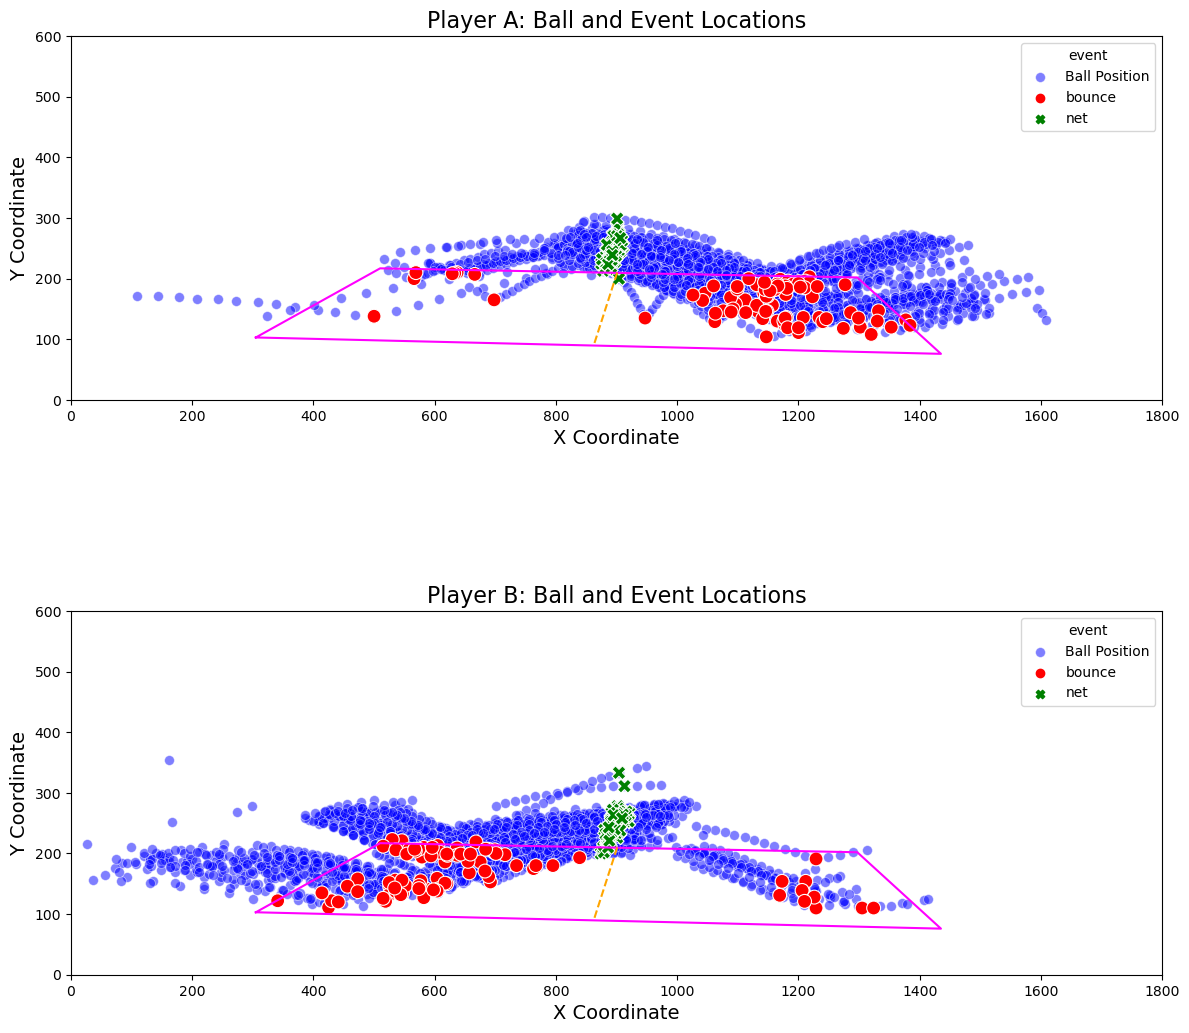

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 테이블 모서리 좌표
table_corners = {'left_bottom': (305, 103),
                'left_top': (510, 217),
                'right_top': (1297, 202),
                'right_bottom': (1435, 76)}

# 네트선 좌표
net_coords = [(901, 210), (862, 89)]

# 탁구대를 그리는 순서에 따라 꼭지점 리스트 생성
table_corners = [
    table_corners['left_bottom'],
    table_corners['left_top'],
    table_corners['right_top'],
    table_corners['right_bottom'],
    table_corners['left_bottom']  # Closing the rectangle
]

# 탁구대 x,y좌표 추출
x_table, y_table = zip(*table_corners)

# 네트 라인의 x,y좌표 추출
x_net, y_net = zip(*net_coords)

# 이벤트 별 색상 지정
event_colors = {'bounce': 'red', 'net': 'green'}

# 이벤트 별 마커 지정
event_markers = {'bounce': 'o', 'net': 'X'}

# 플레이어 별로 보여주기 위한 subplot 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Player A
# 공 좌표
sns.scatterplot(x=ball_df[ball_df['player'] == 'player_A']['x'], 
                y=ball_df[ball_df['player'] == 'player_A']['y'], 
                ax=axes[0], color='blue', alpha=0.5, label='Ball Position', s=50)
# 이벤트 발생 좌표
sns.scatterplot(data=events_df[events_df['player'] == 'player_A'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[0], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선 추가
axes[0].set_title('Player A: Ball and Event Locations', fontsize=16)
axes[0].set_xlabel('X Coordinate', fontsize=14)
axes[0].set_ylabel('Y Coordinate', fontsize=14)
axes[0].invert_yaxis()  # Match the video coordinate system
axes[0].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[0].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[0].set_xlim(0, 1800)
axes[0].set_ylim(0, 600)

# Player B
# 공좌표
sns.scatterplot(x=ball_df[ball_df['player'] == 'player_B']['x'], 
                y=ball_df[ball_df['player'] == 'player_B']['y'], 
                ax=axes[1], color='blue', alpha=0.5, label='Ball Position', s=50)
# 이벤트 발생 좌표
sns.scatterplot(data=events_df[events_df['player'] == 'player_B'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[1], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선 추가
axes[1].set_title('Player B: Ball and Event Locations', fontsize=16)
axes[1].set_xlabel('X Coordinate', fontsize=14)
axes[1].set_ylabel('Y Coordinate', fontsize=14)
axes[1].invert_yaxis()  # Match the video coordinate system
axes[1].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[1].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[1].set_xlim(0, 1800)
axes[1].set_ylim(0, 600)

# Player A와 Player B 축의 aspect ratio를 'equal'로 설정 (찌그러짐 방지)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

위 시각화 결과는 탁구대 위에서 바라봤을 때의 공의 좌표를 나타내지 않는 것으로 보입니다.\
\
논문을 재검토한 결과 TTNet 시스템은 비디오의 2D 평면에서 공의 x,y 좌표를 추적하는 것으로 보입니다. 이는 공의 위치가 탁구 테이블을 상공에서 내려다본 3D 좌표계가 아닌, 비디오의 2D 관점에 따라 결정됨을 의미합니다.\
\
이를 해결하기 위해 공의 x,y좌표를 위에서 바라본 시점으로 변환하려고 하였으나 카메라 각도 부족으로 인해 실패하였고 공의 궤적 예측 모델링에 한계가 예상됩니다.

이어서 bounce와 net 이벤트만 분리해서 시각화하겠습니다.

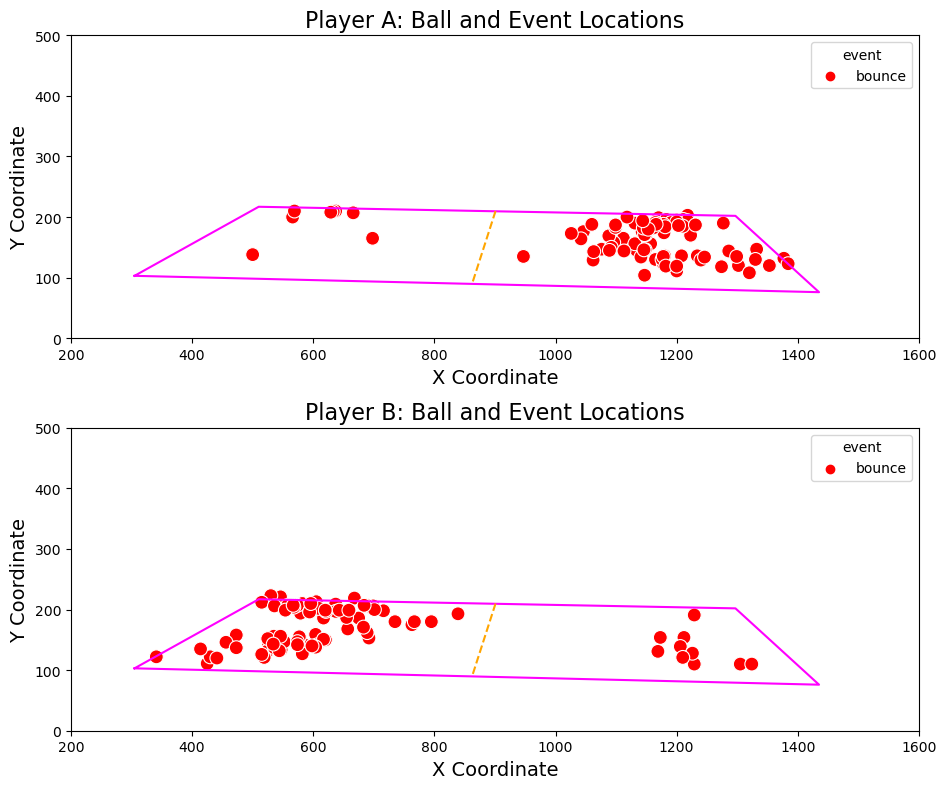

In [4]:
# 플레이어 별로 보여주기 위한 subplot 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Player A
sns.scatterplot(data=events_df[events_df['player'] == 'player_A'][events_df['event'] == 'bounce'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[0], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선
axes[0].set_title('Player A: Ball and Event Locations', fontsize=16)
axes[0].set_xlabel('X Coordinate', fontsize=14)
axes[0].set_ylabel('Y Coordinate', fontsize=14)
axes[0].invert_yaxis()  # Match the video coordinate system
axes[0].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[0].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[0].set_xlim(200, 1600)
axes[0].set_ylim(0, 500)

# Player B
sns.scatterplot(data=events_df[events_df['player'] == 'player_B'][events_df['event'] == 'bounce'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[1], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블 네트선
axes[1].set_title('Player B: Ball and Event Locations', fontsize=16)
axes[1].set_xlabel('X Coordinate', fontsize=14)
axes[1].set_ylabel('Y Coordinate', fontsize=14)
axes[1].invert_yaxis()  # Match the video coordinate system
axes[1].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[1].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[1].set_xlim(200, 1600)
axes[1].set_ylim(0, 500)

# Player A와 Player B 축의 aspect ratio를 'equal'로 설정 (찌그러짐 방지)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

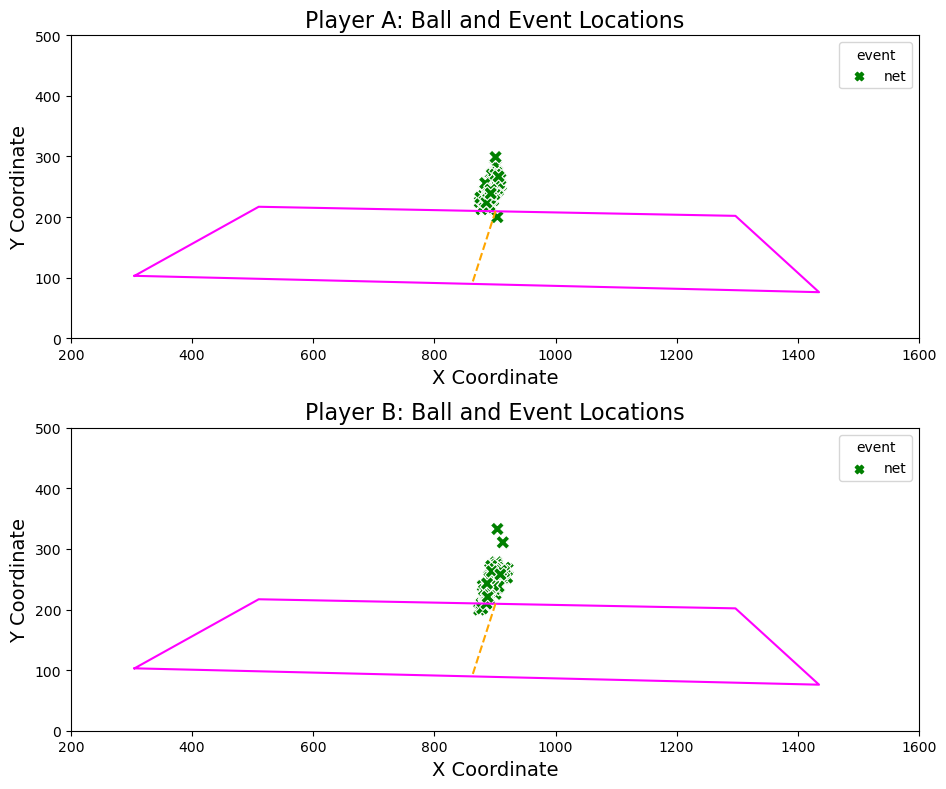

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 테이블 모서리 좌표
table_corners = {'left_bottom': (305, 103),
                'left_top': (510, 217),
                'right_top': (1297, 202),
                'right_bottom': (1435, 76)}

# 네트선 좌표
net_coords = [(901, 210), (862, 89)]

# 탁구대를 그리는 순서에 따라 꼭지점 리스트 생성
table_corners = [
    table_corners['left_bottom'],
    table_corners['left_top'],
    table_corners['right_top'],
    table_corners['right_bottom'],
    table_corners['left_bottom']  # Closing the rectangle
]

# 탁구대 x,y좌표 추출
x_table, y_table = zip(*table_corners)

# 네트 라인의 x,y좌표 추출
x_net, y_net = zip(*net_coords)

# 이벤트 별 색상 지정
event_colors = {'bounce': 'red', 'net': 'green'}

# 이벤트 별 마커 지정
event_markers = {'bounce': 'o', 'net': 'X'}

# 플레이어 별로 보여주기 위한 subplot 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Player A
sns.scatterplot(data=events_df[events_df['player'] == 'player_A'][events_df['event'] == 'net'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[0], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선
axes[0].set_title('Player A: Ball and Event Locations', fontsize=16)
axes[0].set_xlabel('X Coordinate', fontsize=14)
axes[0].set_ylabel('Y Coordinate', fontsize=14)
axes[0].invert_yaxis()  # Match the video coordinate system
axes[0].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[0].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[0].set_xlim(200, 1600)
axes[0].set_ylim(0, 500)

# Player B
sns.scatterplot(data=events_df[events_df['player'] == 'player_B'][events_df['event'] == 'net'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[1], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선
axes[1].set_title('Player B: Ball and Event Locations', fontsize=16)
axes[1].set_xlabel('X Coordinate', fontsize=14)
axes[1].set_ylabel('Y Coordinate', fontsize=14)
axes[1].invert_yaxis()  # Match the video coordinate system
axes[1].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[1].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[1].set_xlim(200, 1600)
axes[1].set_ylim(0, 500)

# Player A와 Player B 축의 aspect ratio를 'equal'로 설정 (찌그러짐 방지)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

In [ ]:
# 플레이어 별로 보여주기 위한 subplot 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Player A
sns.scatterplot(data=events_df[events_df['player'] == 'player_A'][events_df['event'] == 'net'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[0], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선
axes[0].set_title('Player A: Ball and Event Locations', fontsize=16)
axes[0].set_xlabel('X Coordinate', fontsize=14)
axes[0].set_ylabel('Y Coordinate', fontsize=14)
axes[0].invert_yaxis()  # Match the video coordinate system
axes[0].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[0].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[0].set_xlim(200, 1600)
axes[0].set_ylim(0, 500)

# Player B
sns.scatterplot(data=events_df[events_df['player'] == 'player_B'][events_df['event'] == 'net'], 
                x='x', y='y', hue='event', style='event',
                ax=axes[1], palette=event_colors, markers=event_markers, s=100, legend='full')

# 테이블, 네트선
axes[1].set_title('Player B: Ball and Event Locations', fontsize=16)
axes[1].set_xlabel('X Coordinate', fontsize=14)
axes[1].set_ylabel('Y Coordinate', fontsize=14)
axes[1].invert_yaxis()  # Match the video coordinate system
axes[1].plot(x_table, y_table, c='magenta', label='Table Outline')
axes[1].plot(x_net, y_net, c='orange', linestyle='--', label='Additional Line')
axes[1].set_xlim(200, 1600)
axes[1].set_ylim(0, 500)

# Player A와 Player B 축의 aspect ratio를 'equal'로 설정 (찌그러짐 방지)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()